# Transmission Competition

In [2]:
import TC_Functions as TC
import numpy as np
import scipy

## Source Coding Layer

In [6]:
# Functional test for the Source coding layer
print("Simulation of a correct encoding and decoding- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
text = open("CL_text.txt", 'r').read()
print('@source_coding_layer-> Text:', text)
# Get information about the test
TC.get_info_text(text)
# Encode the text using huffman coding and LZW coding
source_encoded_data = TC.source_encoding(text)
# Decode the text using huffman coding and LZW coding
decoded_text = TC.source_decoding(source_encoded_data)
if decoded_text ==  text:
    print("SOURCE CODING LAYER PASSED")
else:
    print("SOURCE CODING LAYER FAILED")

Simulation of a correct encoding and decoding- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
@source_coding_layer-> Text: Hello
@source_coding_layer->Entropy: 1.9219280948873623
@source_coding_layer->Entropy of a uniform distribution: 2.0
@source_coding_layer->Redundancy: 0.039035952556318865
@source_coding_layer-> Text: Hello
@source_coding_layer.HFM-> HUFFMAN ENCODING ////////////////////////////////////////////////
@source_coding_layer.HFM-> Encoded text: 0001111110
@source_coding_layer.HFM-> Huffman dictionary: {'H': '00', 'e': '01', 'l': '11', 'o': '10'}
@source_coding_layer.LZW-> LZW ENCODING ////////////////////////////////////////////////
@source_coding_layer.LZW-> Encoded text: [0, 1, 2, 2, 3]
@source_coding_layer.LZW-> Dictionary: {'H': 0, 'e': 1, 'l': 2, 'o': 3, 'He': 4, 'el': 5, 'll': 6, 'lo': 7}
@source_coding_layer-> Huffman length: 194
@source_coding_layer-> LZW length: 512
@source_coding_layer-> Huffman encoding is the best method
@source_coding_layer-> So

## Channel Coding Layer

In [3]:
# Functional test for the Channel coding layer
msg_1 = [1,0,1,0,1,0,1,0,1,0,1] # 11 bits
msg_2 = [0,0,0,0,0,1,1,1,1,1,1] # 11 bits
msg_3 = [0,0,1,1] # 4 bits

msg = msg_1 + msg_2 + msg_3

Hamming_size = "7x4"

# simulation of a correct transmission
print("Simulation of a correct transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)
print("codeword rx: ", coded_msg)
decoded_msg,fill_bits_number = TC.channel_decoding(coded_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)
if decoded_msg == msg:
    print("CHANNEL CODING LAYER PASSED")
else:
    print("! ! ! CHANNEL CODING LAYER FAILED ! ! !")

# simulation of a transmission with 1 error
print("Simulation of a 1 bit error transmission- - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)
# invert the first bit
coded_msg[0][0] = 1 - coded_msg[0][0]
print("codeword rx: ", coded_msg)
decoded_msg,fill_bits_number = TC.channel_decoding(coded_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)
if decoded_msg == msg:
    print("CHANNEL CODING LAYER PASSED")
else:
    print("! ! ! CHANNEL CODING LAYER FAILED ! ! !")
    
# simulation of a transmission with 2 errors
print("Simulation of a 2 bit errors transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)
# invert the first two bits
coded_msg[0][0] = 1 - coded_msg[0][0]
coded_msg[0][1] = 1 - coded_msg[0][1]
print("codeword rx: ", coded_msg)
decoded_msg,fill_bits_number = TC.channel_decoding(coded_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)
if decoded_msg == msg:
    print("CHANNEL CODING LAYER PASSED")
else:
    print("! ! ! CHANNEL CODING LAYER FAILED ! ! !")



Simulation of a correct transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
message tx:  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
@channel_coding_layer-> ENCODING DATA ////////////////////////////////////////////////
@channel_coding_layer-> SPLITTING DATA ////////////////////////////////////////////////
@channel_coding_layer-> Packets:  [[0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 0, 0], [1, 1, 0, 0]]
@channel_coding_layer-> ENCODING DATA PACKETS ////////////////////////////////////////
codeword tx:  [array([0, 1, 0, 1, 0, 1, 0], dtype=int32), array([1, 0, 1, 1, 0, 1, 0], dtype=int32), array([1, 0, 1, 1, 0, 1, 0], dtype=int32), array([1, 0, 1, 1, 0, 1, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0], dtype=int32), array([1, 1, 1, 1, 1, 1, 1], dtype=int32), array([0, 1, 1, 1, 1, 0, 0], dtype=int32), array([0, 1, 1, 1, 1, 0, 0], dtype=int32)]
codeword rx:  [array([0, 1, 0, 1, 0, 1, 0

In [4]:
# Functional test for the Channel coding layer encapsulation and decapsulation (to delete)
import TC_Functions as TC
# Functional test for the Channel coding layer
msg_1 = [1,0,1,0] # 4 bits
msg_2 = [0,0,0,0] # 4 bits
msg_3 = [1,1,1,1] # 4 bits

msg = msg_1 + msg_2 + msg_3

Hamming_size = "15x11"

# simulation of a correct transmission
print("Simulation of a correct transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)

serialized_msg = TC.channel_coding_encapsulate(coded_msg,Hamming_size)
print("serialized message tx: ", serialized_msg)
deserialized_msg,Hamming_size = TC.channel_coding_decapsulate(serialized_msg)
print("deserialized message rx: ", deserialized_msg)
print(Hamming_size)

decoded_msg,fill_bits_number = TC.channel_decoding(deserialized_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)

Simulation of a correct transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
message tx:  [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]
@channel_coding_layer-> ENCODING DATA ////////////////////////////////////////////////
@channel_coding_layer-> SPLITTING DATA ////////////////////////////////////////////////
@channel_coding_layer-> Packets:  [[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
@channel_coding_layer-> ENCODING DATA PACKETS ////////////////////////////////////////
codeword tx:  [array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int32), array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int32), array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)]
serialized message tx:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
deserialized message rx:  [[0 1 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 0 1 0 0 1 0 1 0 0 0 0 1 1 1]
 [1 

In [14]:
# Functional test for the Channel coding layer decapsulation, not multiple case (to delete)
import TC_Functions as TC
# Functional test for the Channel coding layer
msg_1 = [1,0,1,0,1] # 5 bits
msg_2 = [0,0,0,0,0] # 5 bits
msg_3 = [1,1,1,1,1] # 5 bits
msg_4 = [1,0,1,0,1] # 5 bits

msg = msg_1 + msg_2 + msg_3 + msg_4

Hamming_size = "15x11"

print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)

serialized_msg = TC.channel_coding_encapsulate(coded_msg,Hamming_size)
print("serialized message tx: ", serialized_msg)
# TX >>>>

# add 2 bit so length = 22 bits (not multiple of 15 or 7)
serialized_msg = np.append(serialized_msg,[1,0])

# RX <<<<
deserialized_msg,Hamming_size = TC.channel_coding_decapsulate(serialized_msg)
print("deserialized message rx: ", deserialized_msg)
print(Hamming_size)

decoded_msg,fill_bits_number = TC.channel_decoding(deserialized_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)



Simulation of a correct transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
message tx:  [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
@channel_coding_layer-> ENCODING DATA ////////////////////////////////////////////////
@channel_coding_layer-> SPLITTING DATA ////////////////////////////////////////////////
@channel_coding_layer-> Packets:  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0]]
@channel_coding_layer-> ENCODING DATA PACKETS ////////////////////////////////////////
codeword tx:  [array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int32), array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32), array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)]
serialized message tx:  [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0]
deserialized message rx:  [[0 1 0 1 0 0 0 1 0 0 0 0 0 1 0]
 [1 1 1 0 0 1

## Source Coding Layer + Channel Coding Layer

In [7]:
# legenda:
# ----------------------Transmitter (TX)--------------------
# MSG_TX: message transmitted
# SE_TX: source encoded data transmitted
# CE_TX: channel encoded data transmitted

# ----------------------Receiver (RX)-----------------------
# CE_RX: channel encoded data received
# CD_RX: channel decoded data received
# SD_RX: source decoded data received
# MSG_RX: message received

# user argument input
mode = input("mode, transmission [T] or reception [R]: ")

# check the correct input
if mode != 'T' and mode != 'R':
    print("Error: wrong input")
    exit()
elif mode == 'T':
    print("TRANSMISSION MODE")
    
    # mode and options
    Hamming_size = "7x4"
    
    text_file_name = input("text file: ")
    # Import text from file
    MSG_TX = open(text_file_name+".txt", 'r').read()
    TC.get_info_text(MSG_TX)
    # source coding
    # Encode the text using huffman coding and LZW coding
    SE_TX = TC.source_encoding(MSG_TX)
    # channel coding
    channel_encoded_packets = TC.channel_coding(SE_TX,Hamming_size)
    CE_TX = TC.channel_coding_encapsulate(channel_encoded_packets,Hamming_size)
    # save as .txt file
    np.savetxt('SCD.txt', CE_TX, fmt='%d')


    print("@physical_layer-> TRANSMISSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    

elif mode == 'R':
    print("RECEPTION MODE")
    print("@physical_layer-> RECEPTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

    # get the data from the .txt file
    CE_RX = np.loadtxt('SCD.txt', dtype=int)

    # channel decoding
    deserialized_msg,Hamming_size = TC.channel_coding_decapsulate(CE_RX)
    CD_RX,fill_bits_number = TC.channel_decoding(deserialized_msg,Hamming_size)
    CD_RX = CD_RX[:(len(CD_RX)-fill_bits_number)]

    # source decoding
    SD_RX = TC.source_decoding(CD_RX)
    MSG_RX = SD_RX

    # Check if the received message is equal to the transmitted message
    original_text_name = input("original text file for correctness check: ")
    if MSG_RX == open(original_text_name+".txt", 'r').read():
        print("MESSAGE CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)
    else:
        print("MESSAGE NOT CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)

RECEPTION MODE
@physical_layer-> RECEPTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
@channel_coding_layer-> DECODING DATA PACKETS ////////////////////////////////////////
@channel_coding_layer-> Decoded Packets:  [array([0, 0, 0, 1], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([0, 0, 1, 0], dtype=int32), array([1, 1, 1, 0], dtype=int32), array([1, 0, 1, 0], dtype=int32), array([0, 0, 0, 1], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([1, 1, 0, 1], dtype=int32), array([1, 0, 1, 1], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([1, 0, 1, 0], dtype=int32), array([1, 0, 1, 0], dtype=int32), array([0, 0, 1, 0], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 0, 1], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 0, 1], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 0, 1], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([0, 0, 1, 1], dtype=int32), arra

## Modulation Layer

Time : 1.6


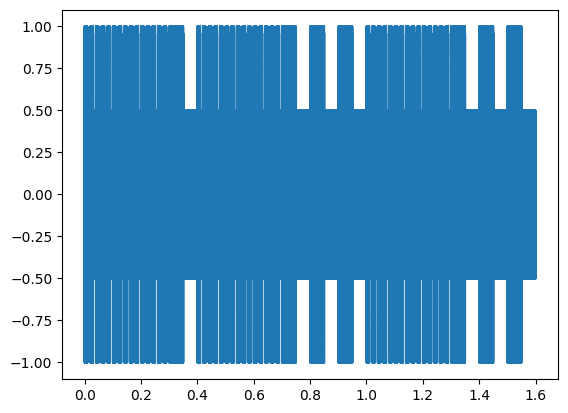

In [1]:
import TC_Functions as TC
import numpy as np
import matplotlib.pyplot as plt

# 30 bits frame
frame1 = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0] # 30 bits
frame2 = [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0]
#frame3 = CE_TX
frame = frame1 + frame2 + frame1 + frame2

frame = TC.syncro_bits_addition(frame)

modulated_frame = TC.am_modulate(frame, fs=44e3, fc=2e3, num_cycles=20)
#display the audio signal
plt.plot(np.arange(len(modulated_frame)) / 44e3, modulated_frame)
TC.display_audio_signal(modulated_frame, fs=44e3)

print("Time : " +  str(len(modulated_frame)/44e3))




Recording... Press 'q' to stop.


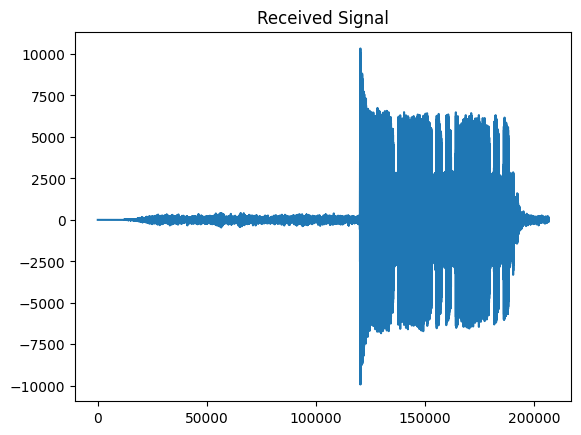

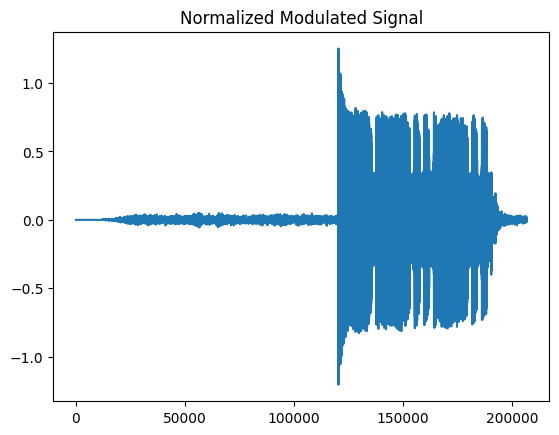

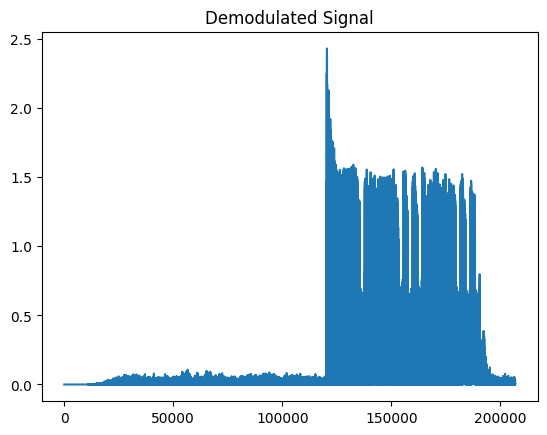

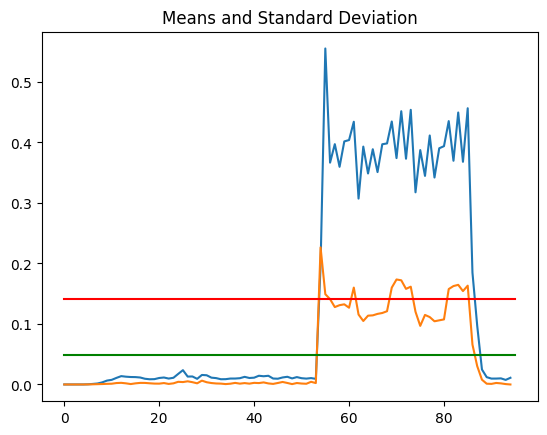

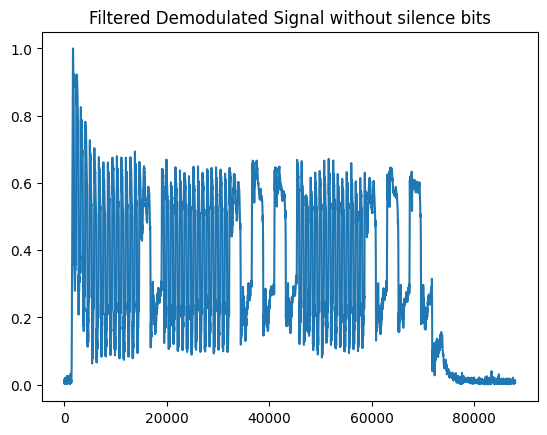

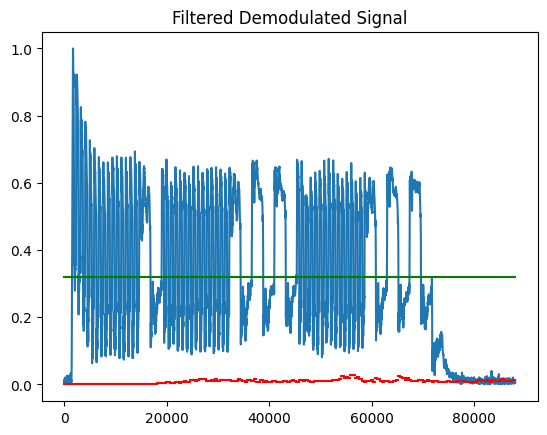

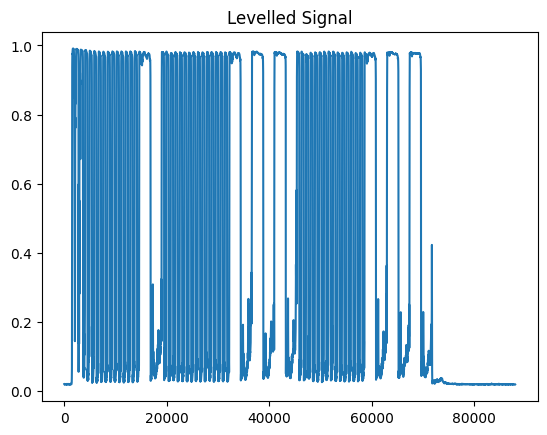

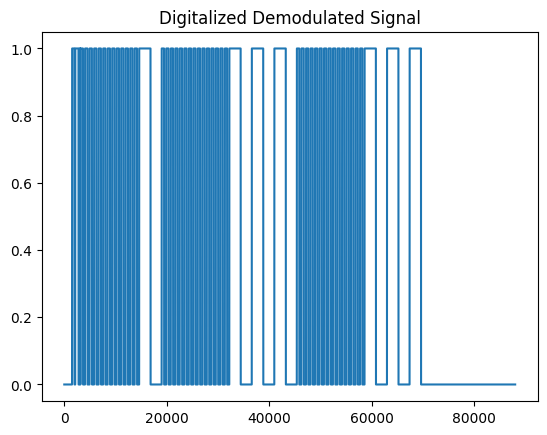

demodulated_signal:  [0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


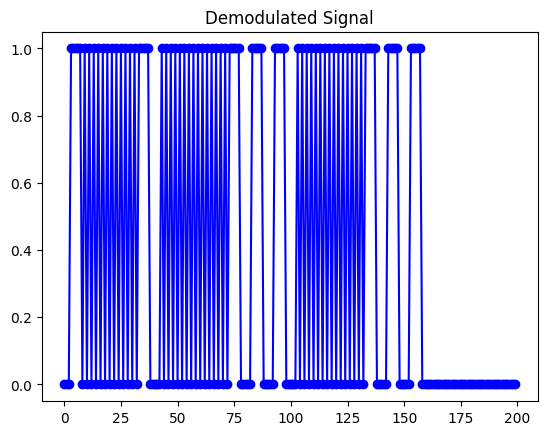

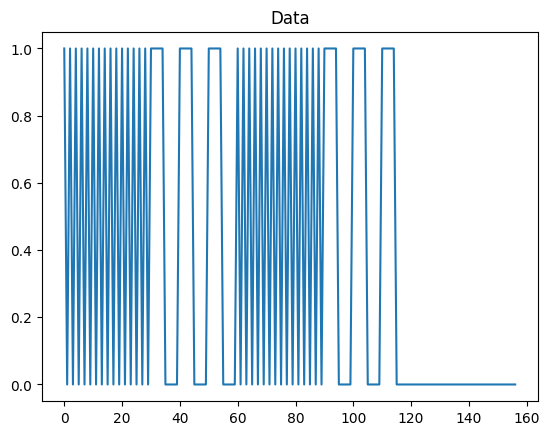

data:  [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [3]:
import TC_Functions as TC
import matplotlib.pyplot as plt
import numpy as np

#record the data from the microphone
fs_M_RX, received_signal = TC.record_audio(int(44e3))

# # read the received signal from the CSV file
# received_signal = np.genfromtxt('RX_modulated_trial.csv', delimiter=',')

plt.figure()
plt.plot(received_signal)
plt.title('Received Signal')
plt.show()

# AM demodulation
demodulated_signal = TC.am_demodulate(received_signal,fs=44e3, fc=2e3, num_cycles=20)

# Plot the demodulated signal
plt.figure()
plt.plot(demodulated_signal,'b',marker='o')
plt.title('Demodulated Signal')
print("demodulated_signal: ", demodulated_signal)

# synchronization bits detection and data extraction
data = TC.syncro_bits_detection(demodulated_signal)
plt.figure()
plt.plot(data)
plt.title('Data')
plt.show()

print("data: ", data)


## Source + Channel + Modulation Layer

In [13]:
# legenda:
# ----------------------Transmitter (TX)--------------------
# MSG_TX: message transmitted
# SE_TX: source encoded data transmitted
# CE_TX: channel encoded data transmitted
# M_TX : modulated data transmitted

# ----------------------Receiver (RX)-----------------------
# M_RX : modulated data received
# CE_RX: channel encoded data received
# CD_RX: channel decoded data received
# SD_RX: source decoded data received
# MSG_RX: message received

# user argument input
mode = input("mode, transmission [T] or reception [R]: ")

# check the correct input
if mode != 'T' and mode != 'R':
    print("Error: wrong input")
    exit()
elif mode == 'T':
    print("TRANSMISSION MODE")
    
    # mode and options
    Hamming_size = "7x4"
    
    text_file_name = input("text file: ")
    # Import text from file
    MSG_TX = open(text_file_name+".txt", 'r').read()
    TC.get_info_text(MSG_TX)
    # source coding
    # Encode the text using huffman coding and LZW coding
    SE_TX = TC.source_encoding(MSG_TX)
    # channel coding
    channel_encoded_packets = TC.channel_coding(SE_TX,Hamming_size)
    CE_TX = TC.channel_coding_encapsulate(channel_encoded_packets,Hamming_size)
    # Add synchronization bits at the beginning of data (10x5+1111+0000)
    CE_TX = TC.syncro_bits_addition(CE_TX)

    # AM modulation
    M_TX = TC.am_modulate(CE_TX,fs=44e3, fc=7.5e3, num_cycles=15)
    
    """
    # Chirp modulation 
    M_TX = TC.chirp_modulate(CE_TX)
    """
    # write the data in a wav file
    scipy.io.wavfile.write('M.wav', int(44e3), np.array(32760 * M_TX, dtype=np.int16))

    #display the audio signal
    TC.display_audio_signal(M_TX, fs=44e3)

    print("Time : " +  str(len(M_TX)/44e3))
    print( str(len(CE_TX)) + " bits to send")


    print("@physical_layer-> TRANSMISSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    

elif mode == 'R':
    print("RECEPTION MODE")
    print("@physical_layer-> RECEPTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

    reading_mode = input("mode, read a file [F] or record [R]: ")

    if reading_mode != 'T' and mode != 'R':
        print("Error: wrong input")
        exit()
    elif reading_mode == 'F' :
        # get the data from the .m4a file
        fs_M_RX, M_RX = scipy.io.wavfile.read('M.wav')
        M_RX = M_RX / 32760

    elif reading_mode == 'R':
        # record the data from the microphone
        fs_M_RX, M_RX = TC.record_audio(int(44e3))

        

    
    # AM demodulation
    CE_RX = TC.am_demodulate(M_RX,fs=44e3, fc=2e3, num_cycles=50)
    print("CE_RX: ", CE_RX)
    # Remove synchronization bits and all before
    CE_RX = TC.syncro_bits_detection(CE_RX)
    print("CE_RX: ", CE_RX)


    """

    # Chirp dedmodulation 
    CE_RX = TC.chirp_demodulate(M_RX, fs_M_RX)
    print(len(CE_RX))
    """

    # channel decoding
    deserialized_msg,Hamming_size = TC.channel_coding_decapsulate(CE_RX)
    CD_RX,fill_bits_number = TC.channel_decoding(deserialized_msg,Hamming_size)
    CD_RX = CD_RX[:(len(CD_RX)-fill_bits_number)]

    # source decoding
    SD_RX = TC.source_decoding(CD_RX)
    MSG_RX = SD_RX

    # Check if the received message is equal to the transmitted message
    original_text_name = input("original text file for correctness check: ")
    if MSG_RX == open(original_text_name+".txt", 'r').read():
        print("MESSAGE CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)
    else:
        print("MESSAGE NOT CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)

TRANSMISSION MODE
@source_coding_layer->Entropy: 4.292184497045626
@source_coding_layer->Entropy of a uniform distribution: 5.247927513443585
@source_coding_layer->Redundancy: 0.18211818169165606
@source_coding_layer-> Text: While eating at a restaurant is an enjoyable and convenient occasional treat, most individuals and families prepare their meals at home. To make breakfast, lunch, and dinner daily, these persons must have the required foods and ingredients on hand and ready to go; foods and ingredients are typically purchased from a grocery store, or an establishment that distributes foods, drinks, household products, and other items that're used by the typical consumer.

Produce, or the term used to describe fresh fruits and vegetables, is commonly purchased by grocery store shoppers. In terms of fruit, most grocery stores offer bananas, apples, oranges, blackberries, raspberries, grapes, pineapples, cantaloupes, watermelons, and more; other grocery stores with larger produce sele

Time : 25.816
12908 bits to send
@physical_layer-> TRANSMISSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
